# EDA 기초

지난 시간에는 결측치를 어떻게 채울지에 대해서 고민해보았습니다.

그런데 일일히 조건을 하나하나 찾아서 집어넣어주는 것 역시 품이 많이 드는 일일것 같습니다.

우리가 지금까지 공부한 인공지능이 대신하게 하는 방법은 없을까요?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
ls

 1st_week.ipynb
 2nd_week.ipynb
'2] The mathematical building blocks of neural networks.ipynb'
 class.csv
'import numpy[Numerical Python] as np.ipynb'
 vgsales_lecture.csv
 zoo.csv


In [8]:
df = pd.read_csv("vgsales_lecture.csv")

In [3]:
df = df.dropna(subset=["Year"])

In [4]:
df["Year"].isnull().sum()

0

In [5]:
df["Year"][13538]

'Adventure'

In [ ]:
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [7]:
df1 = pd.read_csv("zoo.csv")

In [10]:
df1.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [43]:
df1["animal_name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [18]:
df1.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [30]:
df1.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

<AxesSubplot:>

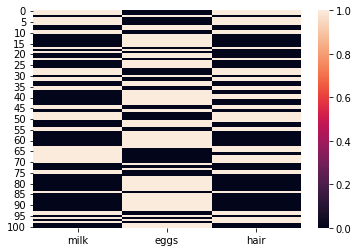

In [36]:
sns.heatmap(df1[["milk", "eggs", "hair"]])

<AxesSubplot:>

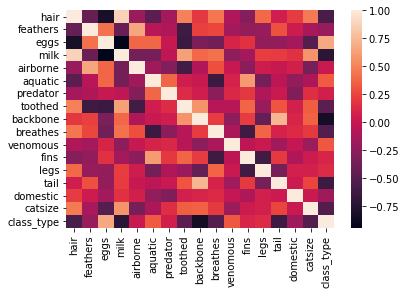

In [45]:
sns.heatmap(df1.corr())

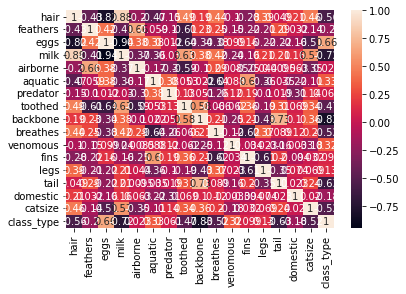

In [48]:
corr = df1.corr()
sns.heatmap(corr,annot = True)
plt.show()

In [15]:
df1["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [8]:
df2 = pd.read_csv("class.csv")

In [16]:
df2

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [17]:
df2["Class_Number"].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


## Unit 4. 머신러닝

본격적으로 들어가기 전에 잠깐 한가지 생각해봅시다

지난 시간 우리는 Exploration 2와 fundamental 일부에서 머신러닝을 배운바 있습니다.

머신러닝과 딥러닝의 가장 큰 차이는 비선형성의 유무라고 하는데요, 단편적으로 말하면 머신러닝은 선형 데이터에 강하고 비선형 데이터에 비교적 약하다, 라고도 말할 수 있을 것 같습니다.

그럼 데이터가 선형인지 비 선형인지는 어떻게 알 수 있을까요?

## Unit 4-1. EDA

유닛 이름에 1이 붙은 이유는 이번 시간에는 Exploration에서 나오는 데이터수집 및 분석 - 모델설계 - 학습 - 평가 순서를 그대로 따라갈 예정이기 때문입니다.

우리는 이 데이터에 대해선 지난 시간에 이어 충분히 살펴봤기 때문에 4-1에선 간단하게 이 데이터에 알맞는 모델을 찾는 작업만 해보겠습니다.(실습에선 여러분이 생각하셨을때 필요할 법한 작업을 EDA 과정에 포함해주세요)

In [49]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


이 중에서 우리는 NA_Sales와 EU_Sales만을 우선 그려보겠습니다.

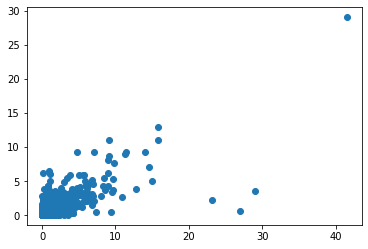

In [50]:
plt.scatter(df['NA_Sales'], df['EU_Sales'])
plt.show()

점이 너무 몰려있어 경향성이 분명하게 보이진 않는군요.

범위를 제한해서 점이 몰려있는 곳을 살펴보겠습니다.

In [55]:
df[df['NA_Sales'] < 20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16591,16594,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,NaN,NaN,NaN,0.01
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,NaN,NaN,NaN,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,NaN,NaN,NaN,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,NaN,NaN,NaN,0.01


In [53]:
df[df['NA_Sales'] < 20]['EU_Sales']

2        12.88
3        11.01
4         8.89
6         9.23
7         9.20
         ...  
16591      NaN
16592      NaN
16593      NaN
16594      NaN
16597      NaN
Name: EU_Sales, Length: 12095, dtype: float64

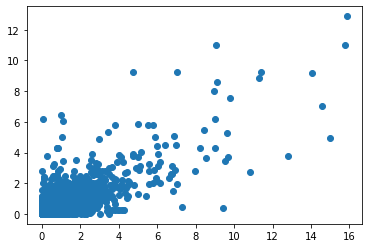

In [51]:
plt.scatter(df[df['NA_Sales'] < 20]['NA_Sales'], df[df['NA_Sales'] < 20]['EU_Sales'])
plt.show()

반대로 너무 작은 값들을 제하고 살펴보겠습니다.

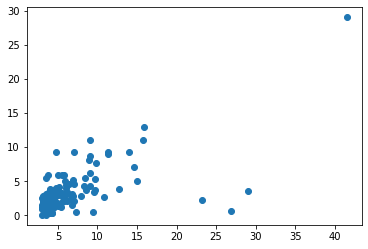

In [52]:
plt.scatter(df[df['NA_Sales'] > 3]['NA_Sales'], df[df['NA_Sales'] > 3]['EU_Sales'])
plt.show()

확대해보니 분명하진 않지만 NA 지역과 EU 지역 사이에는 어떤 연관성(선형성)이 있어 보입니다.

데이터가 얼마나 선형인지는 어떻게 수치화할 수 있을까요?

여러가지 방법이 있겠지만 바로 아래서 간단한 함수를 통해 살펴보겠습니다.

In [56]:
df.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.406506,-0.386400,-0.388086,-0.338654,-0.427397
NA_Sales,-0.406506,1.000000,0.763417,0.500311,0.619445,0.943535
EU_Sales,-0.386400,0.763417,1.000000,0.483069,0.738459,0.905477
JP_Sales,-0.388086,0.500311,0.483069,1.000000,0.272884,0.623417
Other_Sales,-0.338654,0.619445,0.738459,0.272884,1.000000,0.740327
Global_Sales,-0.427397,0.943535,0.905477,0.623417,0.740327,1.000000


df.corr() 함수는 숫자형 데이터인 항목간 비교해줍니다.

물론 아래와 같이 필요한 항목만을 뽑아서 볼 수도 있습니다.

In [57]:
df[['NA_Sales', 'EU_Sales']].corr()

,NA_Sales,EU_Sales
NA_Sales,1.000000,0.763417
EU_Sales,0.763417,1.000000


0.76이면 강한 상관관계를 갖고 있군요.

보통 상관관계라고하면 피어슨 상관관계(Pearson correlation coefficient)를 많이 말합니다.

위 corr() 함수 소개에서도 설명을 드리진 않았지만 method 파라미터의 기본값은 'pearson'입니다.

그럼 피어슨 상관 관계 말고 다른 상관관계는 어떤게 있을지 아래 블로그를 보고 살펴봅시다.

Pearson, Spearman, Kendall 상관 계수의 차이

https://bskyvision.com/116

Kendall 상관 계수

https://medium.com/@leejukyung/%EC%BC%84%EB%8B%AC%ED%83%80%EC%9A%B0-kendalltau-18fb90ba4e7

### 조별과제

아래 링크는 kaggle 데이터를 모아둔 페이지입니다.

https://www.kaggle.com/datasets

여기에선 trending dataset이나 popular dataset도 제공하지만 조금 더 내려보면 사진과 같이 각각의 카테고리에 따라 제공하기도 합니다.

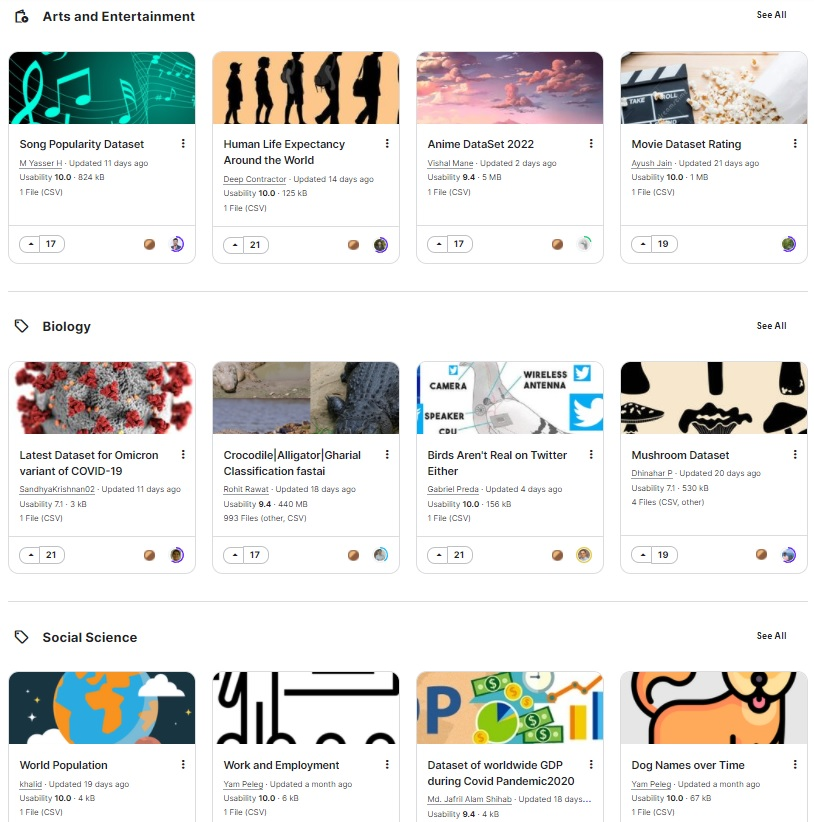

조별로 카테고리를 정하고 그 중 하나의 데이터 셋을 골라서 해당 데이터는 어떤 상관관계가 있을지 생각해봅시다.

이미지 같은 데이터셋을 골랐다고 하더라도 그 안에는 강하고 약하고를 떠나 분명 어떤 관계가 있을 것입니다.

## Unit 4-2. 데이터 전처리

데이터 전처리는 각각의 분야나 업무에 따라 다양한 작업을 내포하고 있겠지만 인공지능 분야에서는 모델이 받아들일 수 있도록 데이터를 정제한다는 의미가 포함되어있습니다.(당연히 다른 의미가 없다는 것은 아닙니다)

해당 작업을 해보도록 하겠습니다.

train set과 test set은 NA_Sales와 EU_Sales를 예측변수(value)로 삼고 JP_Sales를 정답(label)로 하는 데이터로 만들어보겠습니다.

In [59]:
df["NA_Sales"].notnull().sum()

12099

In [66]:
df["JP_Sales"].notnull().loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]]

IndexingError: Too many indexers

In [9]:
# 실은 맨 뒤에 .loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]] 부분은 없어도 되지만 편의상 넣었습니다.

train_data = df[df["NA_Sales"].notnull() & df["EU_Sales"].notnull() & df["JP_Sales"].notnull()].loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]]

target_data = df[df["NA_Sales"].notnull() & df["EU_Sales"].notnull() & df["JP_Sales"].isnull()].loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]]

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 0 to 14301
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NA_Sales  2439 non-null   float64
 1   EU_Sales  2439 non-null   float64
 2   JP_Sales  2439 non-null   float64
dtypes: float64(3)
memory usage: 76.2 KB


In [69]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 60 to 16284
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NA_Sales  7305 non-null   float64
 1   EU_Sales  7305 non-null   float64
 2   JP_Sales  0 non-null      float64
dtypes: float64(3)
memory usage: 228.3 KB


In [70]:
train_data.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.769302,0.512546
EU_Sales,0.769302,1.000000,0.482180
JP_Sales,0.512546,0.482180,1.000000


In [71]:
train_data.corr(method = 'kendall')

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.580697,0.132134
EU_Sales,0.580697,1.000000,0.085725
JP_Sales,0.132134,0.085725,1.000000


In [72]:
train_data.corr(method = 'spearman')

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,0.749634,0.189089
EU_Sales,0.749634,1.000000,0.117528
JP_Sales,0.189089,0.117528,1.000000


혹시 데이터를 전처리하는 과정동안 변화가 있을 수 있기 때문에 다시 한 번 상관관계를 분석해보니 선형성이 나쁘지 않아서 선형모델을 통해서도 충분히 예측 할 수 있을 것 같습니다.

그럼 마지막 작업으로 데이터를 모델이 받아들일 수 있는 형태로 변경해보겠습니다.

In [10]:
X_train = train_data[["NA_Sales", "EU_Sales"]].values
y_train = train_data[["JP_Sales"]].values

In [20]:
df.iloc[1]

Rank                            2
Name            Super Mario Bros.
Platform                      NES
Year                         1985
Genre                    Platform
Publisher                Nintendo
NA_Sales                    29.08
EU_Sales                     3.58
JP_Sales                     6.81
Other_Sales                  0.77
Global_Sales                40.24
Name: 1, dtype: object

In [26]:
df.iloc[1].values

array([2, 'Super Mario Bros.', 'NES', '1985', 'Platform', 'Nintendo',
       29.08, 3.58, 6.81, 0.77, 40.24], dtype=object)

In [24]:
df.iloc[1].value_counts()

2                    1
Super Mario Bros.    1
NES                  1
1985                 1
Platform             1
Nintendo             1
29.08                1
3.58                 1
6.81                 1
0.77                 1
40.24                1
Name: 1, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [75]:
X_target = target_data[["NA_Sales", "EU_Sales"]].values
y_target = target_data[["JP_Sales"]].values

혹시 헷깔리실 수 있으니 정리해드리겠습니다.

train data : 모델이 학습할 데이터

test data : 모델 성능을 평가할 데이터

target data : 처음 목적대로 JP_Sales가 비어있는 데이터(우리가 모델로 예측해서 채워넣을 데이터)

## Unit 4-3. 모델링

모델은 위의 EDA 과정을 통해 선형모델을 사용하면 될 것 같습니다.

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Unit 4-4. 학습 및 평가하기

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [78]:
prediction = model.predict(X_test)
prediction[:10]

array([[0.43737109],
       [0.4442917 ],
       [0.25736551],
       [0.21332938],
       [0.41592162],
       [0.20827326],
       [0.17354398],
       [0.39302725],
       [0.8708736 ],
       [0.18221134]])

In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
mse

0.24784872119567944

In [80]:
from mpl_toolkits.mplot3d import Axes3D

NameError: name 'color' is not defined

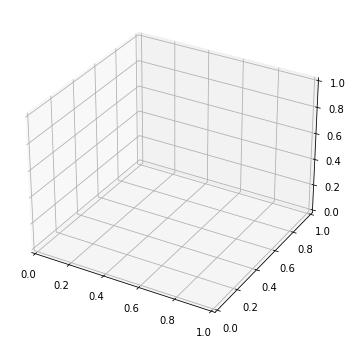

In [81]:
xs = X_test[:, 0]
ys = X_test[:, 1]
zs = y_test
ps = prediction

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=color, marker='o', s=15, cmap='Greens')
ax.scatter(xs, ys, ps, marker='o', s=15)

plt.show()

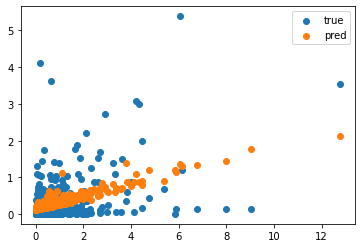

In [82]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

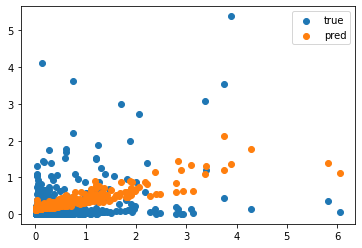

In [83]:
plt.scatter(X_test[:, 1], y_test, label="true")
plt.scatter(X_test[:, 1], prediction, label="pred")
plt.legend()
plt.show()

## Unit 4-5. 적용하기

어떤가요? 모델의 성능이 마음에 드시나요?

모델 개선은 여러분의 몫으로 남겨두고 전 이 모델을 사용해보도록 하겠습니다.

In [84]:
tgt_predictions = model.predict(X_target)
tgt_predictions[:10]

array([[1.2615871 ],
       [1.14738139],
       [1.01913333],
       [0.94094368],
       [0.95524681],
       [0.91082489],
       [0.89884816],
       [1.01396603],
       [0.77396613],
       [0.70089439]])

In [85]:
type(tgt_predictions)

numpy.ndarray

prediction의 결과물은 numpy array로 나왔습니다.

In [86]:
target_data[["JP_Sales"]].values

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [87]:
type(target_data[["JP_Sales"]].values)

numpy.ndarray

다행히도 pandas는 방금 보셨듯 numpy와 자유자재로 넘나들 수 있습니다.

In [88]:
target_data[["JP_Sales"]] = tgt_predictions

In [89]:
target_data[["JP_Sales"]].values

array([[1.2615871 ],
       [1.14738139],
       [1.01913333],
       ...,
       [0.12864651],
       [0.12864651],
       [0.12864651]])

In [90]:
target_data

,NA_Sales,EU_Sales,JP_Sales
60,6.05,3.15,1.261587
83,0.98,6.42,1.147381
89,7.28,0.45,1.019133
98,4.79,1.90,0.940944
102,3.51,3.03,0.955247
...,...,...,...
16135,0.01,0.01,0.128647
16154,0.01,0.01,0.128647
16193,0.01,0.01,0.128647
16222,0.01,0.01,0.128647


### 조별과제

성능이야 어쨌든 처음엔 비어있었을 JP_Sales 데이터에 우리가 예측한 데이터로 잘 채워넣었습니다!

저희는 target_data를 따로 만들어 진행했지만 df에 직접 반영하실 수도 있겠죠?

물론 우리는 NA지역과 EU지역의 데이터만을 이용해 보았을 뿐 알아보지 않았지 연도정보라던가 플랫폼, 장르 등 판매량에 영향을 미칠 수 있는 부분이 더 많이 있을 것입니다.

혹은 다른 부분, 전처리, 모델링 부분에서도 개선할 점이 널려있겠죠!(lms에서는 어떤 것을 했는지 다시 한 번 살펴보면 더 많은 것을 찾아내실 수 있을겁니다!)

1. 어떻게 개선할까?(20분)

2. 개선 방안 적용해보기

3. (Optional)원하는 데이터를 골라서 Unit 4를 진행해보기

In [91]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,NaN,NaN,NaN,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,NaN,NaN,NaN,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,NaN,NaN,NaN,NaN,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,NaN,0.01,NaN,NaN,0.01


In [95]:
df[df.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df3 = df["Year"].dropna()

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16327, dtype: object